#### In this project i'm trying to analyse  the brazil housing data,my motive to find whichcity is perfect for cheep relocation during the work from home period.
* I used matplotlib and seaborn for visualization.
* Other libraries used are pandas,numpy and tabulate

In [1]:
import matplotlib.pyplot as plt   
from tabulate import tabulate               
import matplotlib as mat                   
import seaborn as sns                       
import pandas as pd                         
import numpy as np 

In [2]:
df = pd.read_csv("data (1) (1).csv") #reading the data

In [3]:
df.head() #printing the fist 5 rows

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
# number of rows and columns
print(df.shape)

(10692, 13)


In [6]:
print(df.columns)

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum() # checking is there any null values in it

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# LEVEL 1 Analysis 

In [9]:

def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:     
        if df[column].nunique() < 100:     
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)       

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


 #      𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝐶𝑎𝑡𝑒𝑔𝑜𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

In [10]:
def info_of_cat(col): 
    print('Unique values in are:' ,df[col].unique())
    print('Mode of  is', df[col].mode()[0]) 
    print('Number of missing values in  is:', df[col].isnull().sum()) 
    if df[col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {col} column")

## Analysis on city

In [11]:
info_of_cat('city')

Unique values in are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of  is São Paulo
Number of missing values in  is: 0


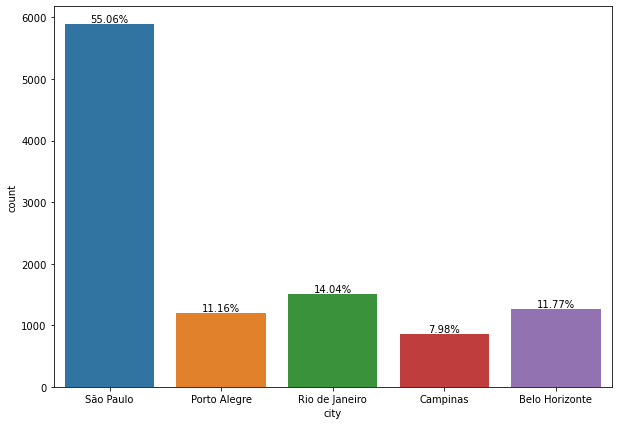

In [12]:
 fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["city"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /df.shape[0]*100, 2)}%"
    x = bar.get_x() + bar.get_width() /2                        
    y = bar.get_height()                                           
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()

### Interpretation:
* considering the the avilabe houses 55% of the total is from sao paulo
* As we have this much option to select from, we can speculate that sao paulo have much affordable options than the others.


## Analysis on rooms:

In [13]:
info_of_cat('rooms')

Unique values in are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of  is 3
Number of missing values in  is: 0


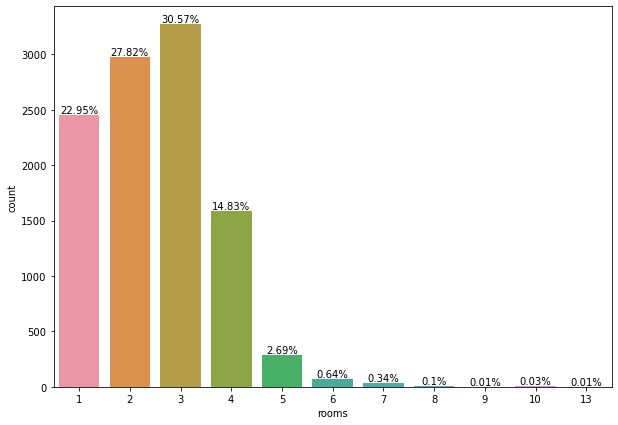

In [14]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["rooms"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /df.shape[0]*100, 2)}%"
    x = bar.get_x() + bar.get_width() /2                        
    y = bar.get_height()                                           
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()

## Interpretation:
* 23% 0f the houses are with only one bedroom.
* 30.5% of them are having 3 room option
* 96% of the availabe options are having 1-4 bedroom,rest all may be luxurious and more expesive.

### analysis on count of bathrooms

In [15]:
info_of_cat('bathroom')

Unique values in are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of  is 1
Number of missing values in  is: 0


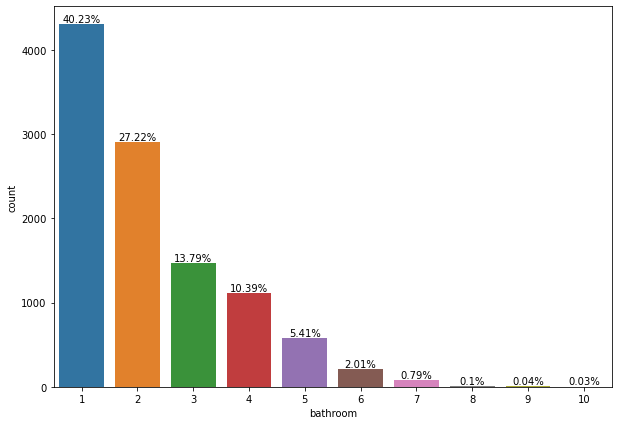

In [16]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["bathroom"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /df.shape[0]*100, 2)}%"
    x = bar.get_x() + bar.get_width() /2                        
    y = bar.get_height()                                           
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()

## Interpretation:
* 40% of them are having a single bathroom.
* 92% of them are having 1-4 bathroom,those who are above can be consiered as expesive options.

###  Analysis on parking spaces

In [17]:
info_of_cat('parking spaces')

Unique values in are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of  is 1
Number of missing values in  is: 0


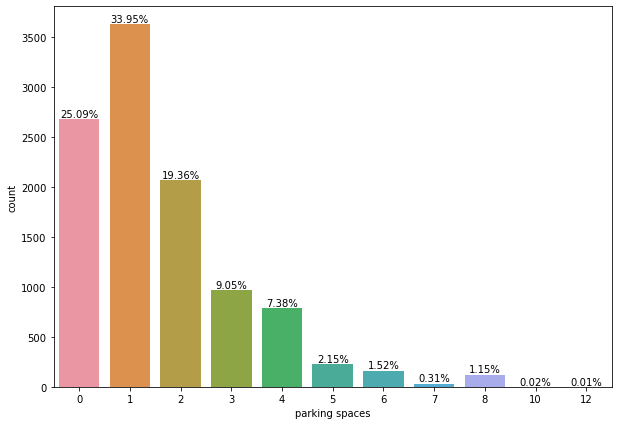

In [18]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["parking spaces"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /df.shape[0]*100, 2)}%"
    x = bar.get_x() + bar.get_width() /2                        
    y = bar.get_height()                                           
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()

## Interpretation:
* 25% of the houses doesnt have a parking space.
* 34% of them have a single parking space.


### Analysis on floor

In [19]:
info_of_cat('floor')

Unique values in are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of  is 0
Number of missing values in  is: 0


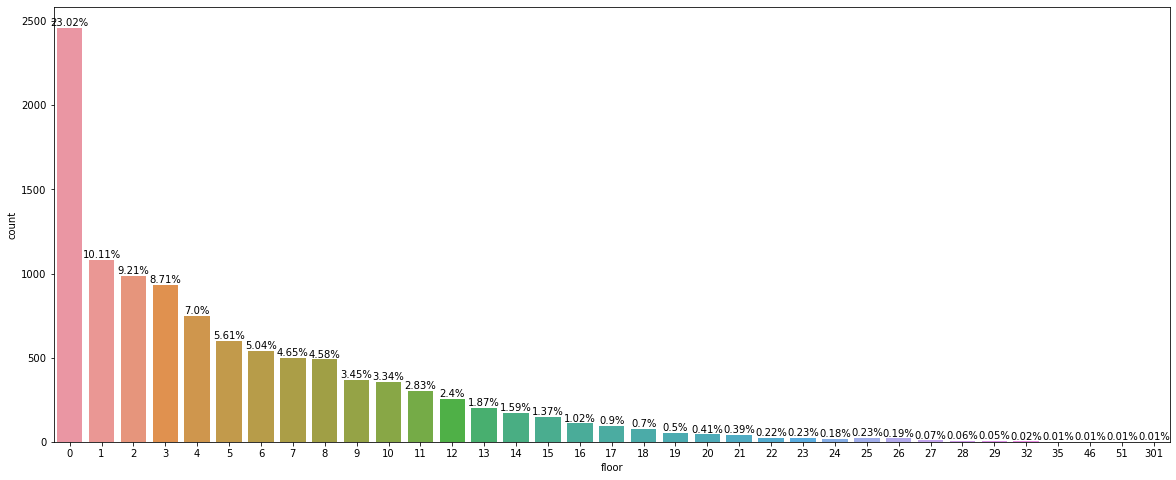

In [20]:
fig, ax = plt.subplots(figsize= (20, 8))
ax = sns.countplot(x = df["floor"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /df.shape[0]*100, 2)}%"
    x = bar.get_x() + bar.get_width() /2                        
    y = bar.get_height()                                           
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()

###  Interpretation:
* Here the higest numbers of appartments are in the ground floor itself ie 23% of the total data set.
* 85% of the appartments are in 0-10th floor.
* 301th floor is clearly an outlier or we can say that it actully doesnt exist.

### Analyisis on peremiting animals

In [21]:
info_of_cat('animal')

Unique values in are: ['acept' 'not acept']
Mode of  is acept
Number of missing values in  is: 0


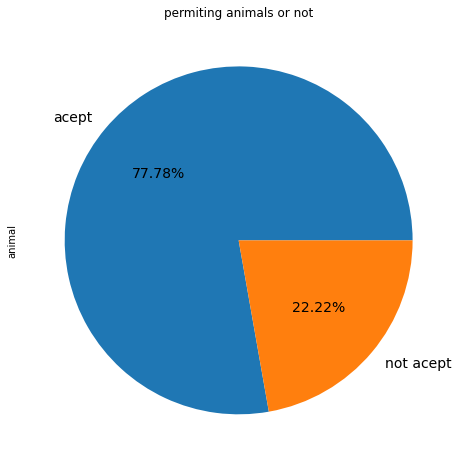

In [22]:
ax=df.groupby(['animal'])['animal'].count().plot.pie(title='permiting animals or not',figsize=(10,8), autopct= "%0.2f%%",fontsize=14)

## Interpertation:
* 77,7% of apparments allows pets in their property

### Analysis on furniture

In [23]:
info_of_cat('furniture')

Unique values in are: ['furnished' 'not furnished']
Mode of  is not furnished
Number of missing values in  is: 0


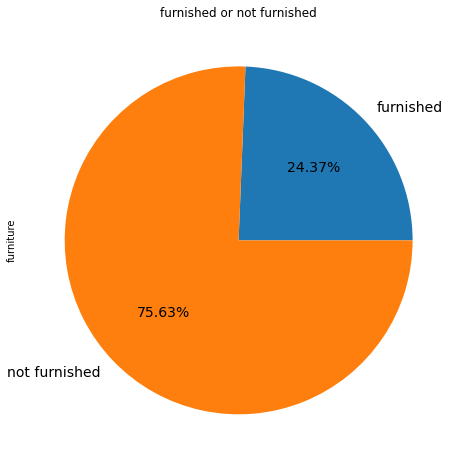

In [24]:
ax=df.groupby(['furniture'])['furniture'].count().plot.pie(title='furnished or not furnished',figsize=(10,8), autopct= "%0.2f%%",fontsize=14)

## Interpertation:
* 75% of those properties are not furnished. only 25% of them had essential furnitures in them.

# 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝑁𝑢𝑚𝑒𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

In [25]:
def numerical(col):
    print('The mean of the  is:', df[col].mean())
    print('The median of the  is :',df[col].median())
    print('The mode of the  is :',df[col].mode()[0])
    print('The standard deviation of the  is :',df[col].std())
    print('Number of missing values in the  is:',df[col].isnull().sum())

In [26]:
print(continuous)

['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']


In [27]:
numerical('area')

The mean of the  is: 149.21791994014217
The median of the  is : 90.0
The mode of the  is : 50
The standard deviation of the  is : 537.0169423364867
Number of missing values in the  is: 0


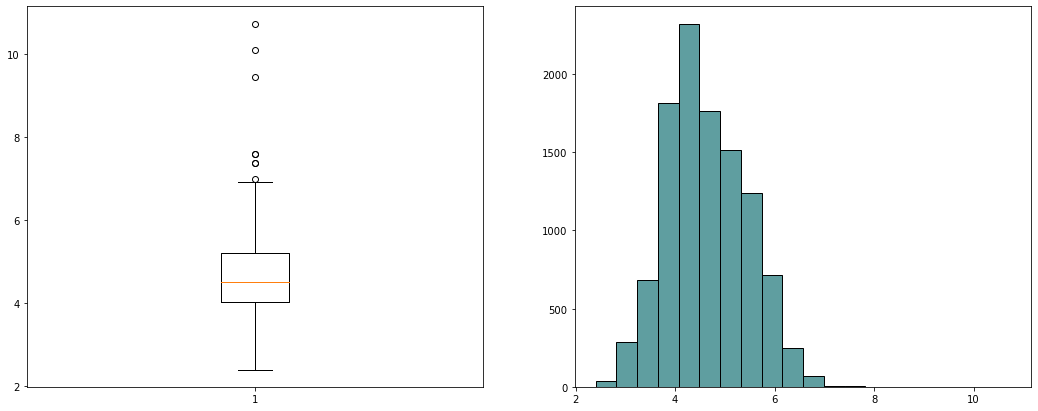

In [28]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.boxplot(np.log(df['area']))

plt.subplot(1,2,2)
plt.hist(np.log(df['area']),bins=20,edgecolor='black',color='cadetblue')



plt.show()

In [29]:
# IQR
q1=np.percentile(df['area'],25)
q3=np.percentile(df['area'],75)
iqr=q3-q1
print(iqr)

126.0


In [30]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print(upper,lower)

371.0 -133.0


In [31]:
ndf=df.copy()

In [32]:
#here we are removing the otliers that are above tge upper bound
mean = int(ndf.area.mean())
x = ndf[ndf["area"] > 371].index
for index in x:
    ndf.loc[index, "area"] =mean
print(mean)

149


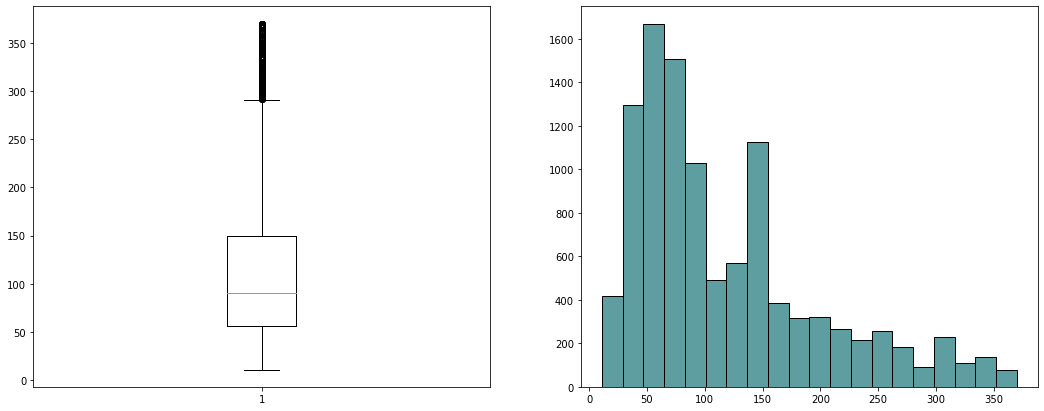

In [33]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.boxplot(ndf['area'])

plt.subplot(1,2,2)
plt.hist(ndf['area'],bins=20,edgecolor='black',color='cadetblue')



plt.show()

### Analysis on rent amount

In [34]:
numerical('rent amount (R$)')

The mean of the  is: 3896.247194163861
The median of the  is : 2661.0
The mode of the  is : 2500
The standard deviation of the  is : 3408.5455176710816
Number of missing values in the  is: 0


In [35]:
#here we are removing the otliers that are above tge upper bound
mean2 = int(ndf['rent amount (R$)'].mean())
x = ndf[ndf["rent amount (R$)"] > 20000].index
for index in x:
    ndf.loc[index, "rent amount (R$)"] =mean2
print(mean2)

3896


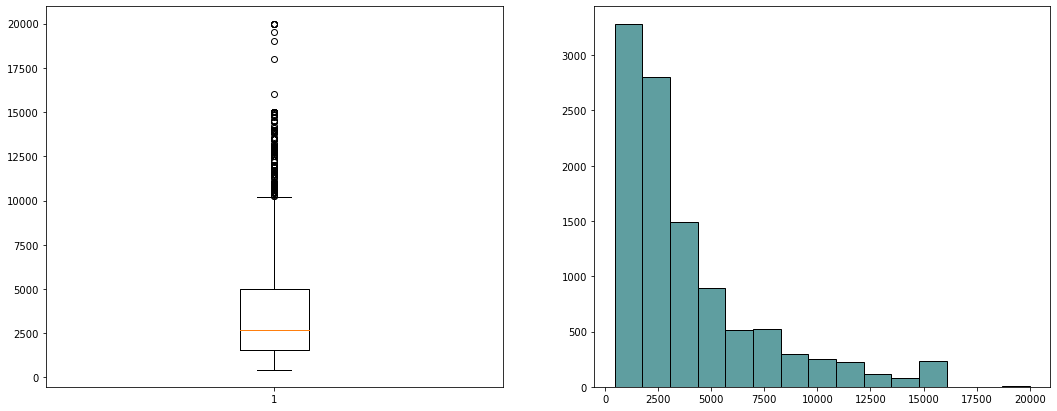

In [36]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.boxplot(ndf['rent amount (R$)'])

plt.subplot(1,2,2)
plt.hist(ndf['rent amount (R$)'],bins=15,edgecolor='black',color='cadetblue')



plt.show()

### Analysis on property tax

In [37]:
numerical('property tax (R$)')

The mean of the  is: 366.70435839880287
The median of the  is : 125.0
The mode of the  is : 0
The standard deviation of the  is : 3107.832321161917
Number of missing values in the  is: 0


In [38]:
#outlier treatment
mean2 = int(ndf['property tax (R$)'].mean())
x = ndf[ndf["property tax (R$)"] > 2000].index
for index in x:
    ndf.loc[index, "property tax (R$)"] =mean2
print(mean2)

366


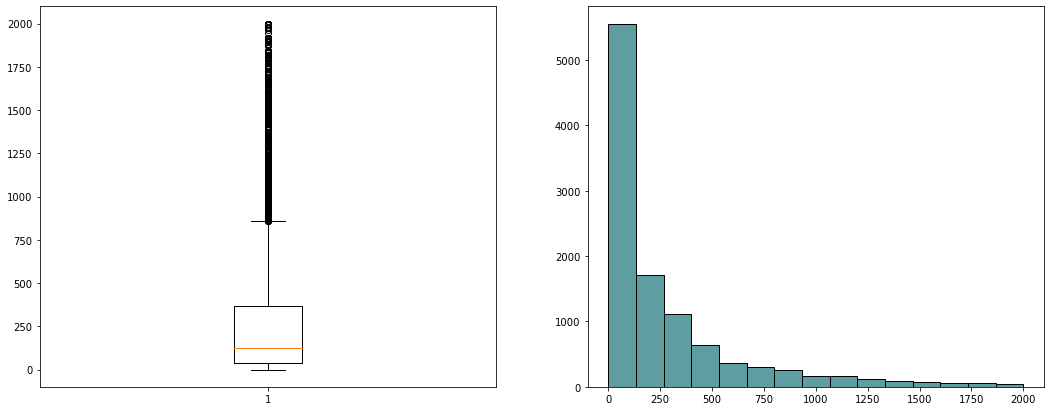

In [39]:

plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.boxplot(ndf['property tax (R$)'])

plt.subplot(1,2,2)
plt.hist(ndf['property tax (R$)'],bins=15,edgecolor='black',color='cadetblue')



plt.show()

# $Level 2  Analysis$

In [40]:

print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## Relationship between city and rooms

In [41]:
table=pd.pivot_table(data=df,index=['city'],values=['total (R$)'],columns=['rooms'],aggfunc='count')
print(table)


               total (R$)                                                      \
rooms                  1       2       3      4      5     6     7    8    9    
city                                                                            
Belo Horizonte      150.0   286.0   389.0  317.0   78.0  20.0  13.0  4.0  NaN   
Campinas            218.0   253.0   271.0   91.0   14.0   4.0   2.0  NaN  NaN   
Porto Alegre        374.0   424.0   299.0   62.0   22.0   9.0   1.0  2.0  NaN   
Rio de Janeiro      404.0   522.0   422.0  128.0   18.0   3.0   3.0  NaN  NaN   
São Paulo          1308.0  1490.0  1888.0  988.0  156.0  32.0  17.0  5.0  1.0   

                          
rooms            10   13  
city                      
Belo Horizonte  1.0  NaN  
Campinas        NaN  NaN  
Porto Alegre    NaN  NaN  
Rio de Janeiro  NaN  1.0  
São Paulo       2.0  NaN  


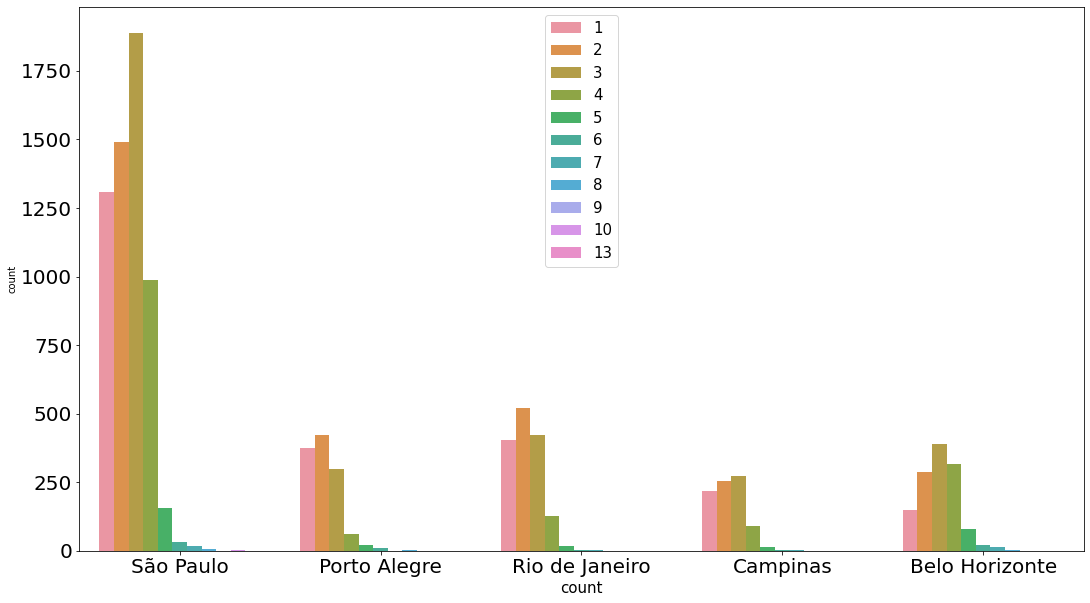

In [42]:
fig,ax=plt.subplots(figsize=(18,10))
#sns.set(font_scale=2)
sns.countplot(data=df,x='city',hue='rooms')
plt.xlabel('count',fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both',which='major',labelsize=20)
plt.show()

## interpertation
* sao paulo had more 3 room appartments ,which is significantly higehr than the other apartments.
* porto Alegre and rio de janerio had slightly more 2 room appartments.
* belo Horizonte had more 3 room appartments.

## Relationship between city and permiting animals

In [43]:
table=pd.pivot_table(data=df,index=['city'],values=['total (R$)'],columns=['animal'],aggfunc='count')
print(table)

               total (R$)          
animal              acept not acept
city                               
Belo Horizonte        931       327
Campinas              693       160
Porto Alegre         1005       188
Rio de Janeiro       1205       296
São Paulo            4482      1405


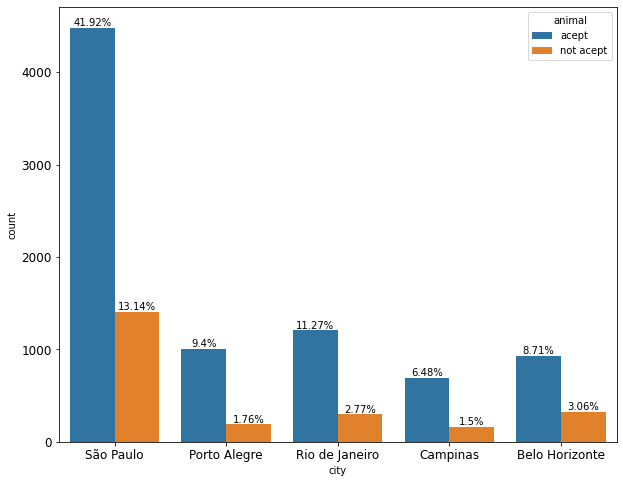

In [44]:
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.countplot(data=df,x='city',hue='animal')
plt.tick_params(axis='both',which='major',labelsize=12)
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /df.shape[0]*100, 2)}%"
    x = bar.get_x() + bar.get_width() /2                        
    y = bar.get_height()                                           
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    

plt.show()

## interpertation
* 42% of those appartments which allows pets are in sao paulo
* the last number of appartments which allows pets are in campinas

## Relationship betwen city and furnished apparments

In [45]:
table=pd.pivot_table(data=df,index=['city'],values=['total (R$)'],columns=['furniture'],aggfunc='count')
print(table)

               total (R$)              
furniture       furnished not furnished
city                                   
Belo Horizonte        177          1081
Campinas              111           742
Porto Alegre          319           874
Rio de Janeiro        406          1095
São Paulo            1593          4294


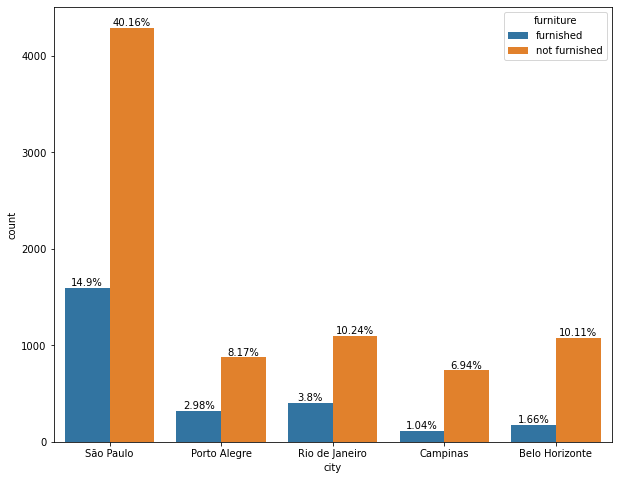

In [46]:
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.countplot(data=df,x='city',hue='furniture')
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /df.shape[0]*100, 2)}%"
    x = bar.get_x() + bar.get_width() /2                        
    y = bar.get_height()                                           
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()


## Interpertation:
* Sao paulo had more furnished apparments.
* Even if we combined the furnished and non-furnished together ,sao paulo had more furnished homes than the rest.

### Relationship between animal and furniture

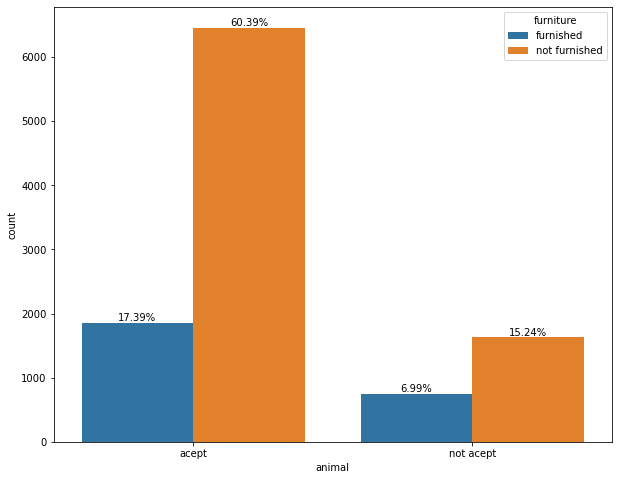

In [47]:
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.countplot(data=df,x='animal',hue='furniture')
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /df.shape[0]*100, 2)}%"
    x = bar.get_x() + bar.get_width() /2                        
    y = bar.get_height()                                           
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
                                                                    
plt.show()



## Interpertation
* 17.3% of the those appartments who acept pets are furnished.
* 60% of who acept are not furnished

# $num-num- analysis$

### relation between area and rent amount

<AxesSubplot:xlabel='area', ylabel='rent amount (R$)'>

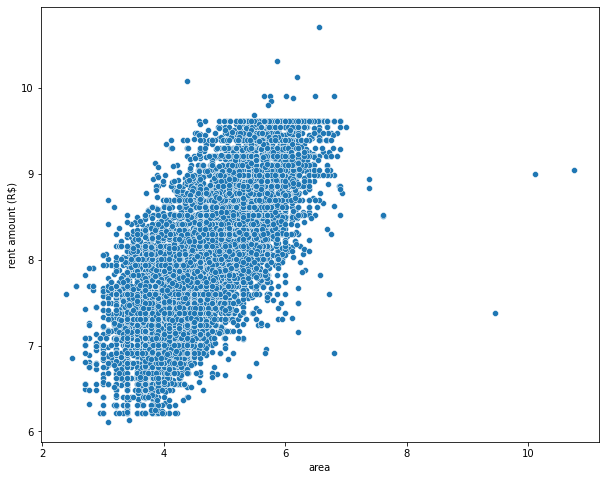

In [48]:
#here we are using the log of data because to uderstand the the skeewness of the large data which is spred largly
fig,ax =plt.subplots(figsize=(10,8))
sns.scatterplot(data=df,x=np.log(df['area']),y=np.log(df['rent amount (R$)'])) 

## Interpertation
* the increase in rental amount is directly propotional to increase in area.
* As in most of the cases an appartment with more area will be expensive in rental amount.

### Relation between area and propery tax

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


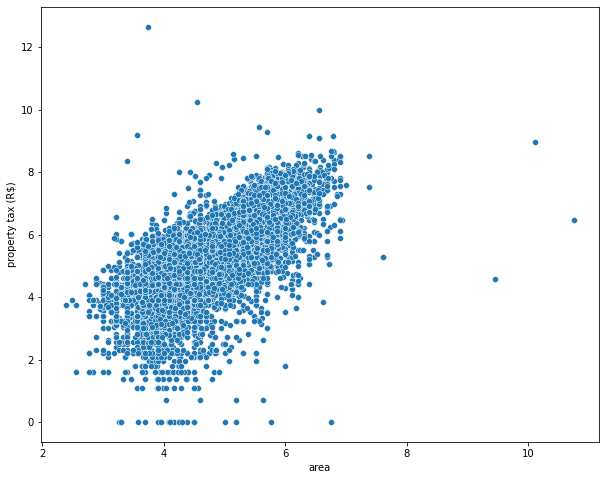

In [49]:
fig,ax =plt.subplots(figsize=(10,8))
sns.scatterplot(data=df,x=np.log(df['area']),y=np.log(df['property tax (R$)']))
plt.show()

### Relation between area and fire insurance


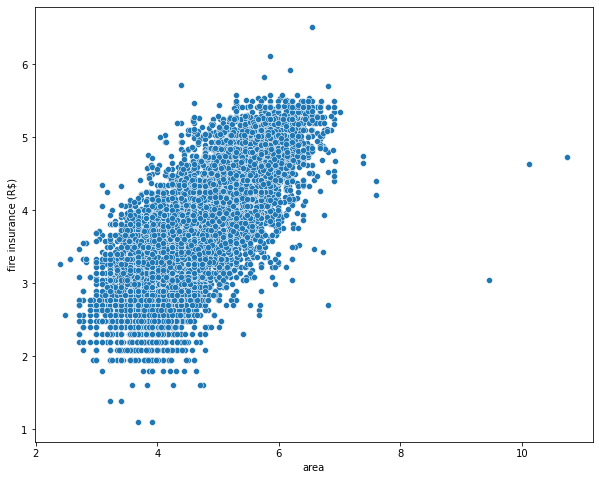

In [50]:
fig,ax =plt.subplots(figsize=(10,8))
sns.scatterplot(data=df,x=np.log(df['area']),y=np.log(df['fire insurance (R$)']))
plt.show()

## Interpertation
* fire insurance and property tax also increases with area, same as in the case of rental amount

# Num-cat analysis

## Analyisis of city wise rent amount

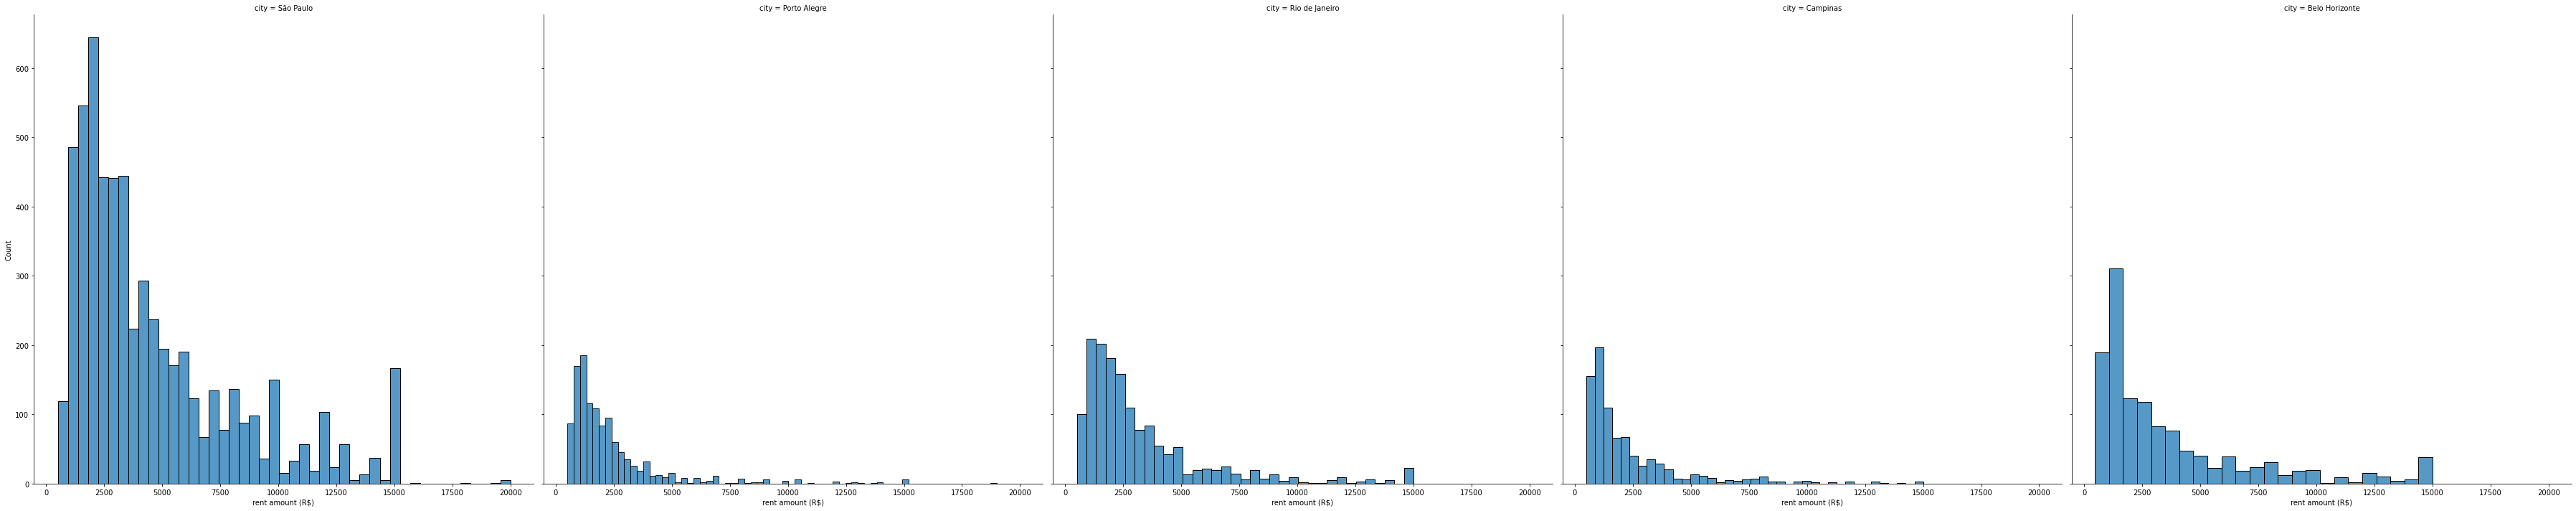

In [51]:


g=sns.FacetGrid(ndf,col='city',height=10)
g.map(sns.histplot,'rent amount (R$)')
plt.show()

### Interpertation:
*  As sao paulo is having most number of appartments ,its rental amount is wide spread and also sao paulo had more homes in the cheeper rental range, but considering the overall sao paulo will be on expensive side.
* unlike sao paulo ,porto alegre had most of the houses under the 2500 , which we can consider that porto alegre is a cheeper option. Campinas is next to it with similar patern
* Rio de janerio had also a wide range of rental amount
* Belo horizonte is also expensive

## Analyisis of room wise area

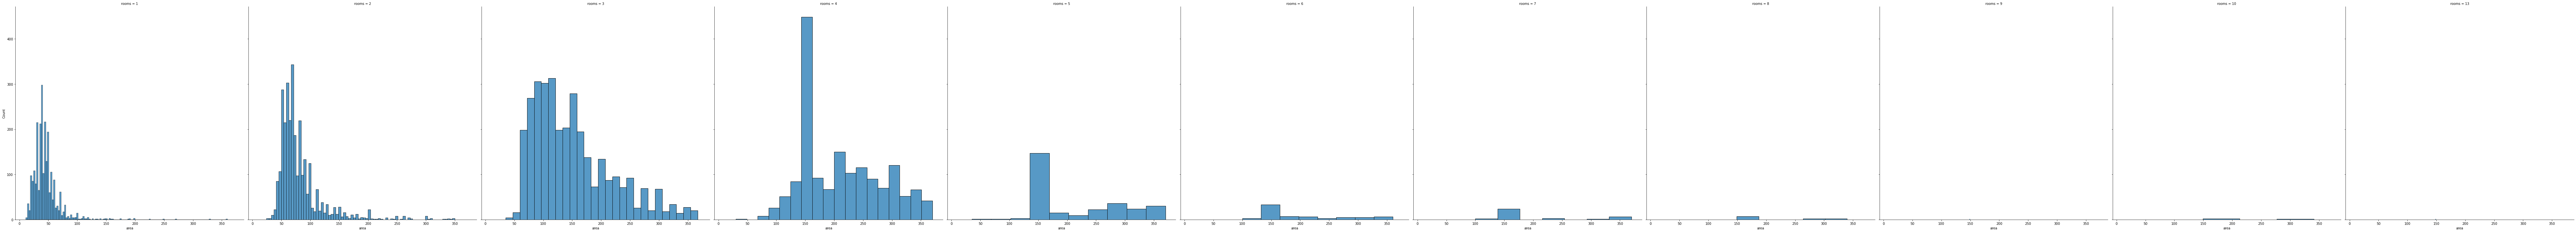

In [52]:
g=sns.FacetGrid(ndf,col='rooms',height=10)
g.map(sns.histplot,'area')
plt.show()

### Interpertation:
* The appartments having 1 room are having area inbetween 25-75 ,most lies in between 40-60.
* 2 room appartments are having area lies in between 50-100.
* 3 room appartments are having area lies 70-250 ,ie it most widly spread than the others.
* 4 room appartments are next to 3 with much widely spread area.

### Relation between city and area


<AxesSubplot:title={'center':'Avg area of houses in each city'}, xlabel='City', ylabel='avg.area'>

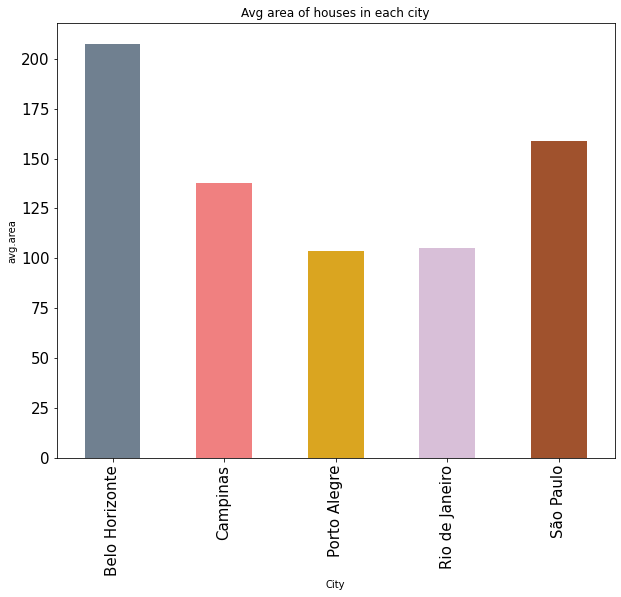

In [53]:
df.groupby(['city'])['area'].aggregate(lambda x: x.mean()).plot(kind='bar' ,xlabel='City',ylabel='avg.area' ,title='Avg area of houses in each city',figsize=(10,8), fontsize=15,color=['slategray','lightcoral','goldenrod','thistle','sienna'])

## Interpertation
* considering the average area Belo Horizonte had more area,followed by sao paulo and campinas.
* Rio de janeiro and Porto Alegre had less.


### Relation between city and rent amount

<AxesSubplot:title={'center':'Avg rental price of houses in each city'}, xlabel='City', ylabel='avg.rental'>

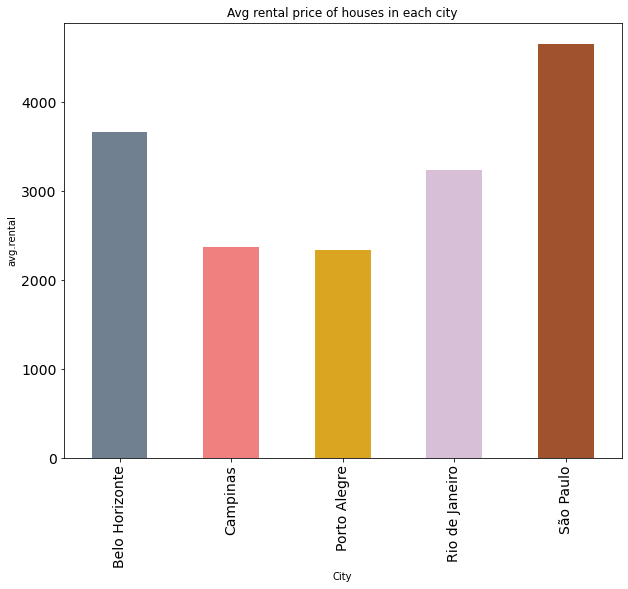

In [54]:
df.groupby(['city'])['rent amount (R$)'].aggregate(lambda x: x.mean()).plot(kind='bar' ,xlabel='City',ylabel='avg.rental' ,title='Avg rental price of houses in each city',figsize=(10,8), fontsize=14,color=['slategray','lightcoral','goldenrod','thistle','sienna'])

## Interpertation:
* sao paulo ,Belo Horizonte and rio De janerio had more more rental amount.
* Campinas and porto Alegre are cheep considering the other three city

## Relation between city and property tax

<AxesSubplot:title={'center':'Avg proprty tax of houses in each city'}, xlabel='City', ylabel='avg.tax'>

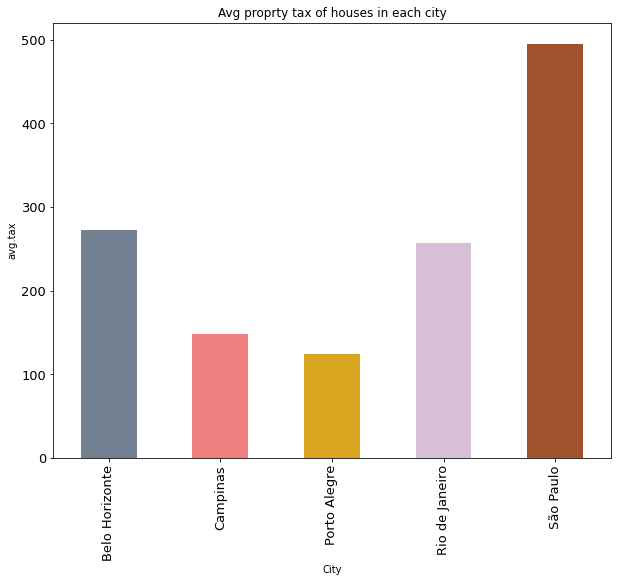

In [55]:
df.groupby(['city'])['property tax (R$)'].aggregate(lambda x: x.mean()).plot(kind='bar' ,xlabel='City',ylabel='avg.tax' ,title='Avg proprty tax of houses in each city',figsize=(10,8), fontsize=13,color=['slategray','lightcoral','goldenrod','thistle','sienna'])

## Interpertation:
* sao paulo had more property tax than all other cities.
* Porto Alegre and Campinas are cheeper


## Relation between HOA and City

<AxesSubplot:title={'center':'Avg hoa of houses in each city'}, xlabel='City', ylabel='avg.hoa'>

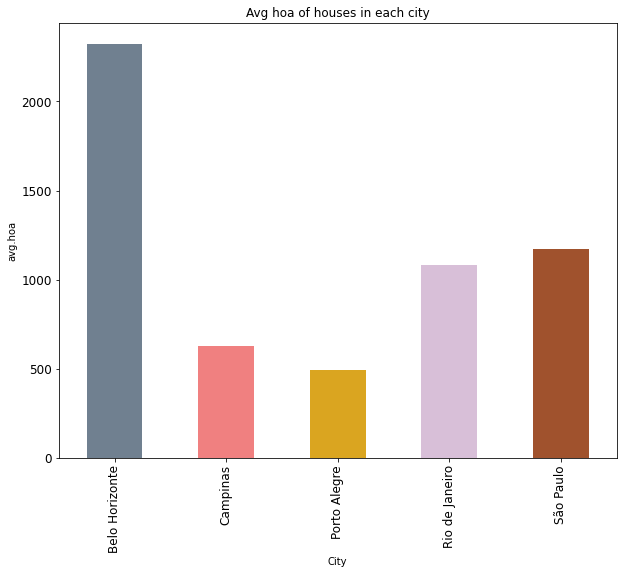

In [56]:
df.groupby(['city'])['hoa (R$)'].aggregate(lambda x: x.mean()).plot(kind='bar' ,xlabel='City',ylabel='avg.hoa' ,title='Avg hoa of houses in each city',figsize=(10,8), fontsize=12,color=['slategray','lightcoral','goldenrod','thistle','sienna'])

## Interpertation:
* Belo Horizonte is most expensive in HOA.
* Campinas and Porto Alegre comes cheeper


## Relation between City and Total expense.

<AxesSubplot:title={'center':'Avg total expense of houses in each city'}, xlabel='City', ylabel='avg.expense'>

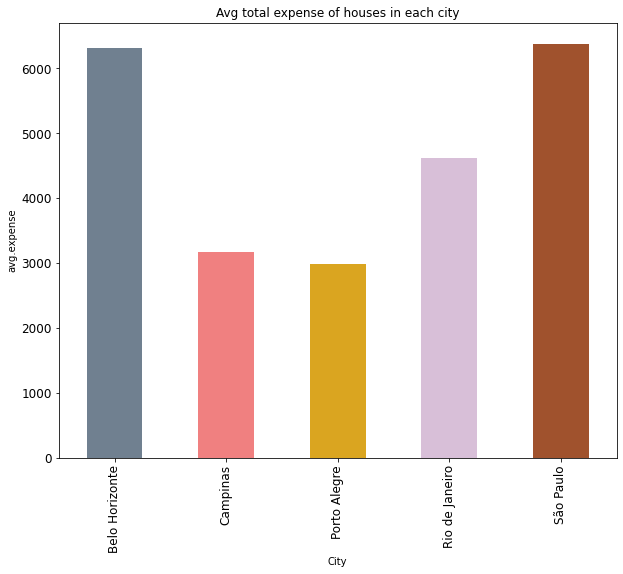

In [57]:
df.groupby(['city'])['total (R$)'].aggregate(lambda x: x.mean()).plot(kind='bar' ,xlabel='City',ylabel='avg.expense' ,title='Avg total expense of houses in each city',figsize=(10,8), fontsize=12,color=['slategray','lightcoral','goldenrod','thistle','sienna'])

## Interpertation:
* Considering the total expence Sao Paulo and Belo Horizonte are most expensive.
* Porto Alegre and Campinas are Cheeper options.

# Leval 3 Analysis - Multivariate Analysis

### Relation between area -Rent amount - furniture

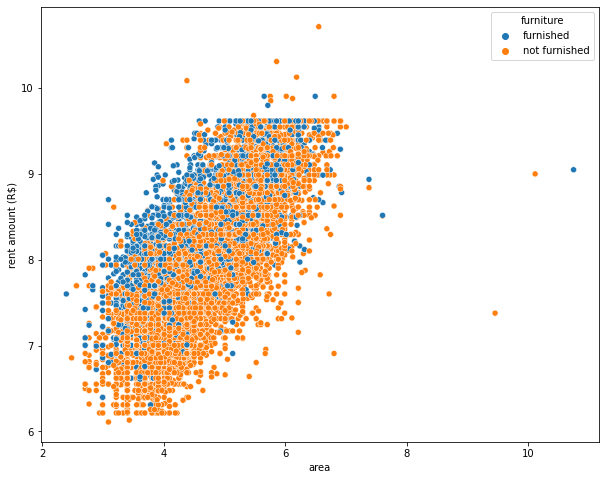

In [58]:
fig,ax =plt.subplots(figsize=(10,8))
sns.scatterplot(data=df,x=np.log(df['area']),y=np.log(df['rent amount (R$)']),hue='furniture')
plt.show()

### Interpertation:

* The furnished appartment with similar Area is more expensive than the non furnished. 

## Relation between Area-Rent amount- Animal

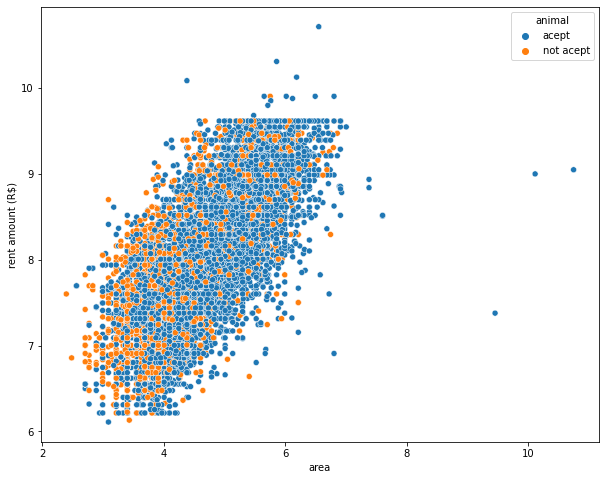

In [59]:
fig,ax =plt.subplots(figsize=(10,8))
sns.scatterplot(data=df,x=np.log(df['area']),y=np.log(df['rent amount (R$)']),hue='animal')
plt.show()

### Interpetation:
* appartments with less area have more tends to not-acepting pets than those with larger area.


# ***$conclusion$***

* in this performd analysis and we found that the average rent amount and average total expance by city,porto Alegre city is cheeper to live. So city porto Alegre will the cheepest city that is good for the relocation. 

* its a mater of fact that the options of Porto Alegre and Campinas is much lesser compared to the other big city, so if the demand for the property rises there will be rise in rental amount.

* On the basis of this given data Porto Alegre is a good Choice to relocate.